# Analysis of US Demographics From 2010 to 2020

In [61]:
#IMPORT THESE IMPORTANT MODULES
import matplotlib.pylab as plt
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import utilities
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading in the Datasets and Turning Them to Dataframes

#### Income

In [59]:
infilename = "Data Sets/2000 Income Cleaned.csv"
df2000Income = utilities.parse_csv_file_to_dataframe(infilename, filetype='income', fileyear='2000')

print('2000 Income Dataframe')
#df2000Income

2000 Income Dataframe


In [5]:
infilename = "Data Sets/2010 Income Cleaned.csv"
df2010Income = utilities.parse_csv_file_to_dataframe(infilename, filetype='income', fileyear='2010')

print('2010 Income Dataframe')
#df2010Income

2010 Income Dataframe


In [6]:
infilename = "Data Sets/2020 Income Cleaned.csv"
df2020Income = utilities.parse_csv_file_to_dataframe(infilename, filetype='income', fileyear='2020')

print('2020 Income Dataframe')
#df2020Income

2020 Income Dataframe


#### Population and Demographics

In [9]:
infilename = "Data Sets/2000 Population Cleaned.csv"
df2000Demographics = utilities.parse_csv_file_to_dataframe(infilename, filetype='demographics', fileyear='2000')

print('2000 Demographics Dataframe')
#df2000Demographics

2000 Demographics Dataframe


In [11]:
infilename = "Data Sets/2010 Population and Demographics Cleaned.csv"
df2010Demographics = utilities.parse_csv_file_to_dataframe(infilename, filetype='demographics', fileyear='2010')

print('2010 Demographics Dataframe')
#df2010Demographics

2010 Demographics Dataframe


In [13]:
infilename = "Data Sets/2020 Population and Demographics Cleaned.csv"
df2020Demographics = utilities.parse_csv_file_to_dataframe(infilename, filetype='demographics', fileyear='2020')

print('2020 Demographics Dataframe')
#df2020Demographics

2020 Demographics Dataframe


#### Removing Non-States from the Dataset

In [60]:
#REMOVES DISTRICT OF COLUMBIA
df2000Income = df2000Income.drop(labels=8, axis=0)
df2000Income = df2000Income.reset_index()
#df2000Income

## Graphs of Features by Year

### Making a New Dataframe With the Calculated Differences and Fractions

In [64]:
#New Dataframe with State Names Copied Over
dfnew = df2010Demographics[['State']].copy()

In [65]:
#Adding all of the calcualted values to the new Dataframe dfnew
#Total Population
a = df2010Demographics['Population']
b = df2020Demographics['Population']
c = b - a
dfnew['Population Change'] = c
dfnew['Population Change Fraction'] = c/a
#Number of Males
d = df2010Demographics['Male']
e = df2020Demographics['Male']
f = e - d
dfnew['Male Change'] = f
dfnew['Male Change Fraction'] = f/d
#Number of Females
g = df2010Demographics['Female']
h = df2020Demographics['Female']
i = h - g
dfnew['Female Change'] = i
dfnew['Female Change Fraction'] = i/g
#Median Income per Household
j = df2010Income['Median']
k = df2020Income['Median']
l = k - j
dfnew['Median Income Change'] = l
dfnew['Median Income Change Fraction'] = l/j
#Mean Income per Household
m = df2010Income['Mean']
n = df2020Income['Mean']
o = n - m
dfnew['Mean Income Change'] = o
dfnew['Mean Income Change Fraction'] = o/m
#Number of White as Only Race
p = df2010Demographics['White']
q = df2020Demographics['White']
r = q - p
dfnew['White Change'] = r
dfnew['White Change Fraction'] = r/p
#Number of Black or African American as Only Race
t = df2010Demographics['Black or African American']
u = df2020Demographics['Black or African American']
v = u - t
dfnew['Black or African American Change'] = v
dfnew['Black or African American Change Fraction'] = v/t
#Printing out a snipit of the new dataframe that was created
dfnew[0:10]

,State,Population Change,Population Change Fraction,Male Change,Male Change Fraction,Female Change,Female Change Fraction,Median Income Change,Median Income Change Fraction,Mean Income Change,Mean Income Change Fraction,White Change,White Change Fraction,Black or African American Change,Black or African American Change Fraction
0,Alabama,107888.0,0.022546,43491.0,0.018728,64397.0,0.026145,11561.0,0.285640,16186.0,0.290186,-80004.0,-0.023650,10652.0,0.008253
1,Alaska,23005.0,0.032221,12217.0,0.032803,10788.0,0.031586,13214.0,0.204627,17521.0,0.215537,-59681.0,-0.113324,-9227.0,-0.278585
2,Arizona,760327.0,0.118547,374279.0,0.117303,386048.0,0.119778,14740.0,0.315031,21542.0,0.342818,50225.0,0.009581,12185.0,0.038940
3,Arkansas,90267.0,0.030896,47674.0,0.033319,42593.0,0.028571,11168.0,0.291539,16975.0,0.324062,-66043.0,-0.028272,-22567.0,-0.046975
4,California,1996660.0,0.053459,992377.0,0.053438,1004283.0,0.053479,20964.0,0.363277,32157.0,0.404669,-2557570.0,-0.103919,-398460.0,-0.150395
5,Colorado,635855.0,0.125935,330791.0,0.130677,305064.0,0.121167,21185.0,0.391981,28510.0,0.393659,274401.0,0.062937,-12116.0,-0.048893
6,Connecticut,-6524.0,-0.001824,2770.0,0.001593,-9294.0,-0.005056,15823.0,0.247111,25263.0,0.280469,-222267.0,-0.077384,-20810.0,-0.051641
7,Delaware,67910.0,0.075475,31112.0,0.071258,36798.0,0.079450,13263.0,0.237488,19758.0,0.272336,-2272.0,-0.003469,9175.0,0.045059
8,District of Columbia,97521.0,0.161338,47408.0,0.165919,50113.0,0.157230,29939.0,0.491585,40628.0,0.437053,36780.0,0.146227,3388.0,0.010747
9,Florida,2373598.0,0.125965,1162046.0,0.126137,1211552.0,0.125800,13294.0,0.299354,21227.0,0.343052,456372.0,0.030955,185701.0,0.058116


### Creating the Graphs

#### Population

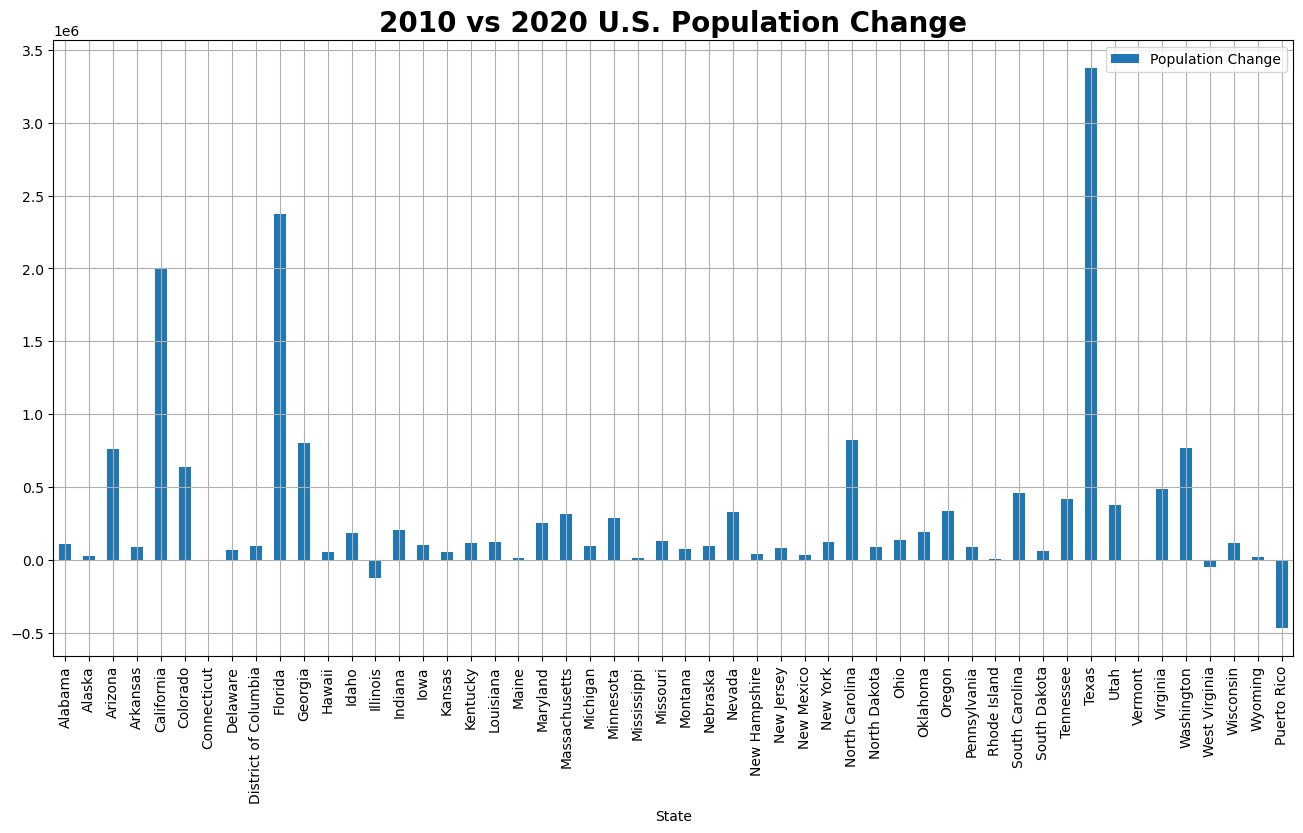

In [73]:
plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State',y='Population Change',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Population Change", fontsize=20, fontweight ='bold')
#plt.ticklabel_format(style='plain')
plt.grid()

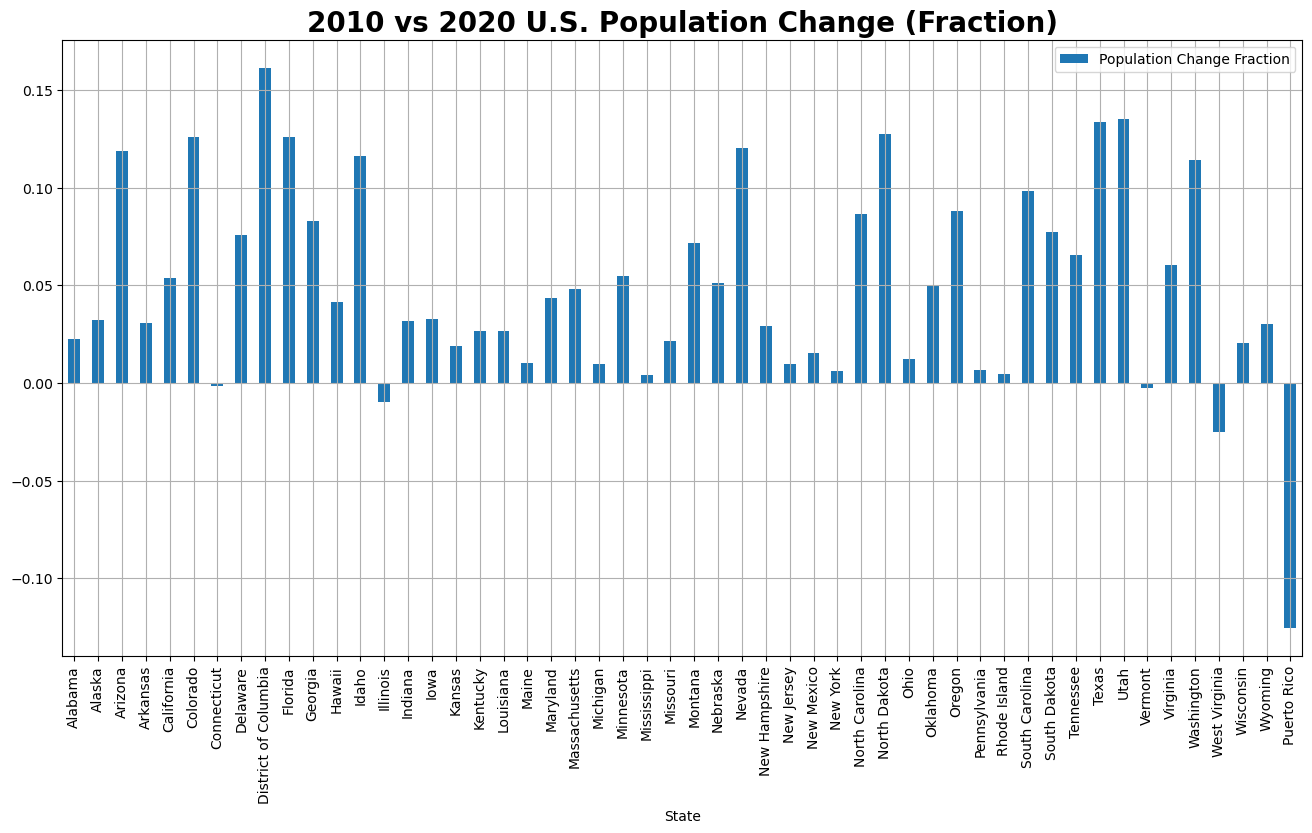

In [67]:
plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State',y='Population Change Fraction',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Population Change (Fraction)", fontsize=20, fontweight ='bold')
plt.grid()

#### Sex (Female, Male)

##### Male

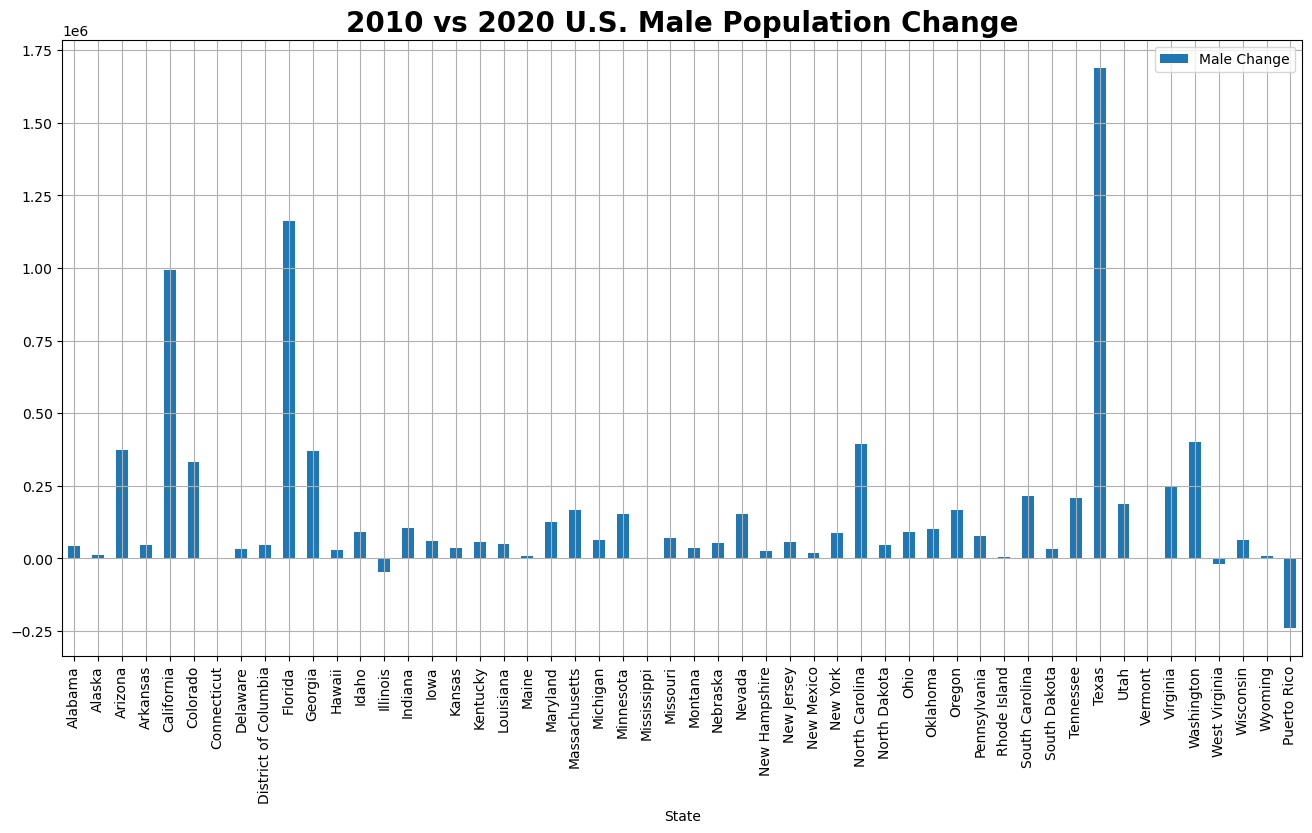

In [74]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='Male Change',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Male Population Change", fontsize=20, fontweight ='bold')
plt.grid()

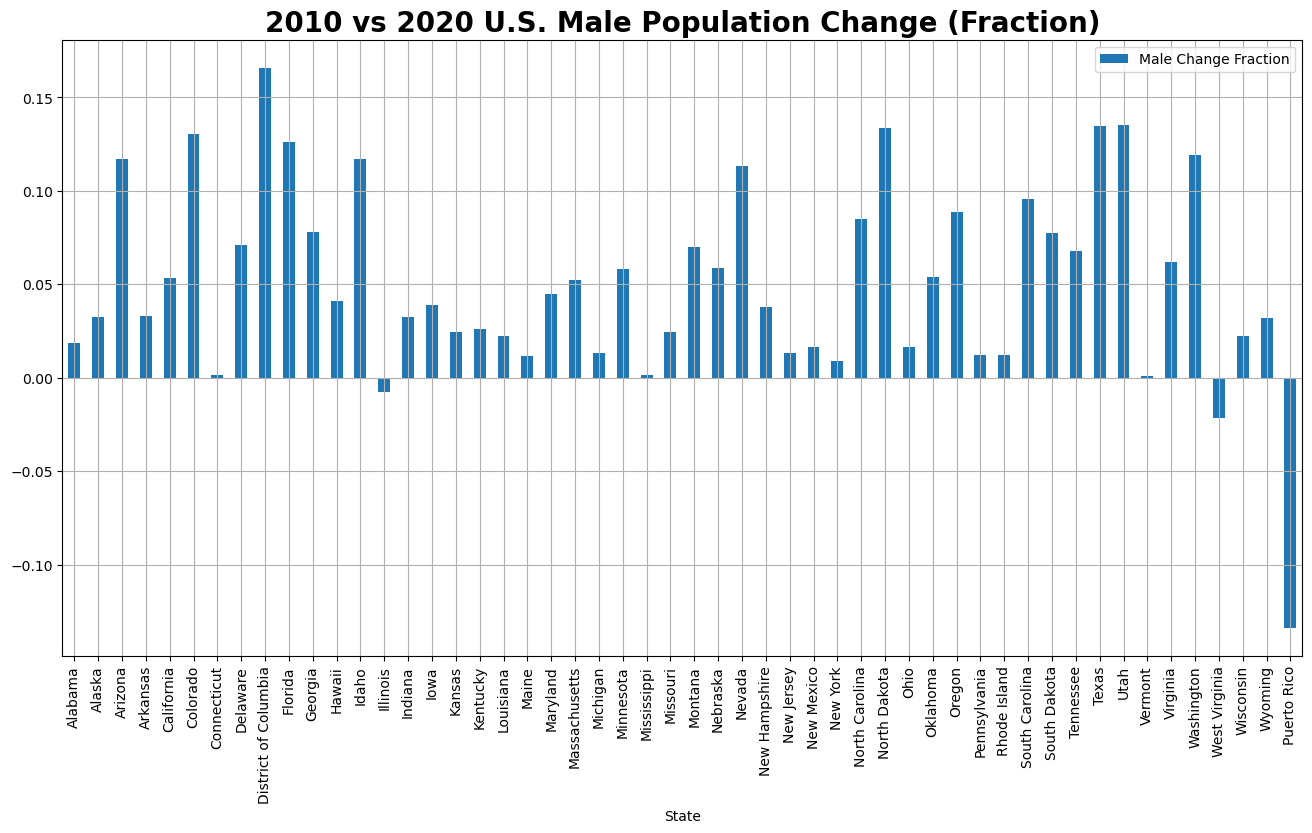

In [76]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='Male Change Fraction',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Male Population Change (Fraction)", fontsize=20, fontweight ='bold')
plt.grid()

##### Female

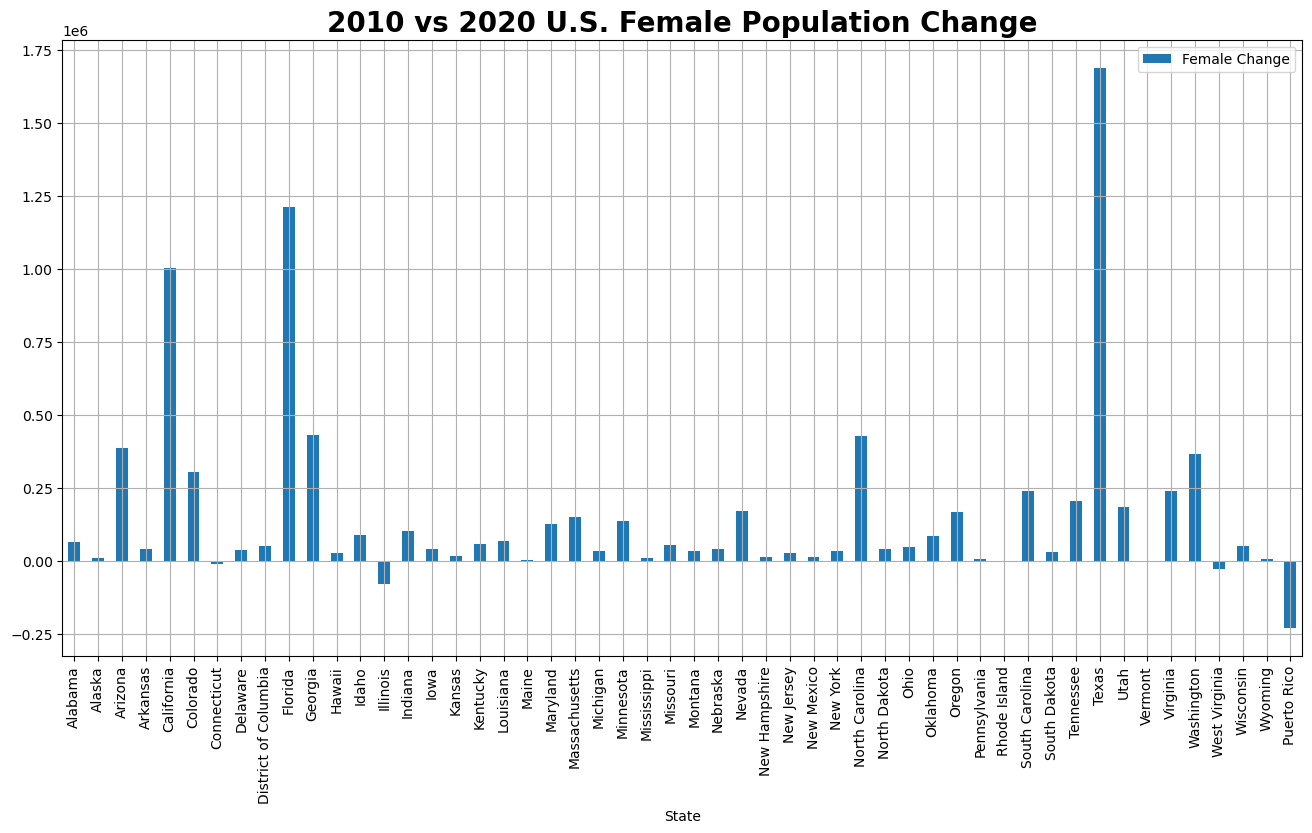

In [77]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='Female Change',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Female Population Change", fontsize=20, fontweight ='bold')
plt.grid()

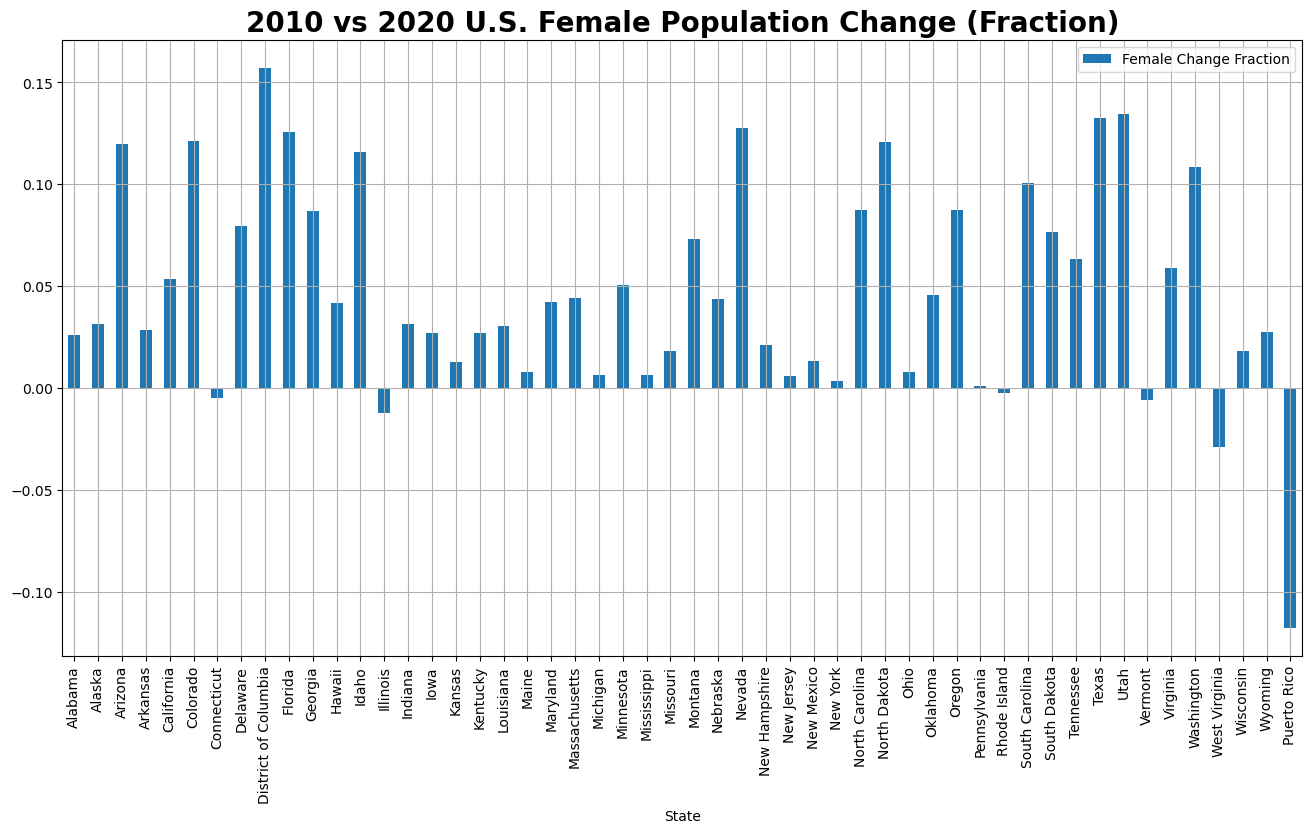

In [78]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='Female Change Fraction',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Female Population Change (Fraction)", fontsize=20, fontweight ='bold')
plt.grid()

#### Median Income

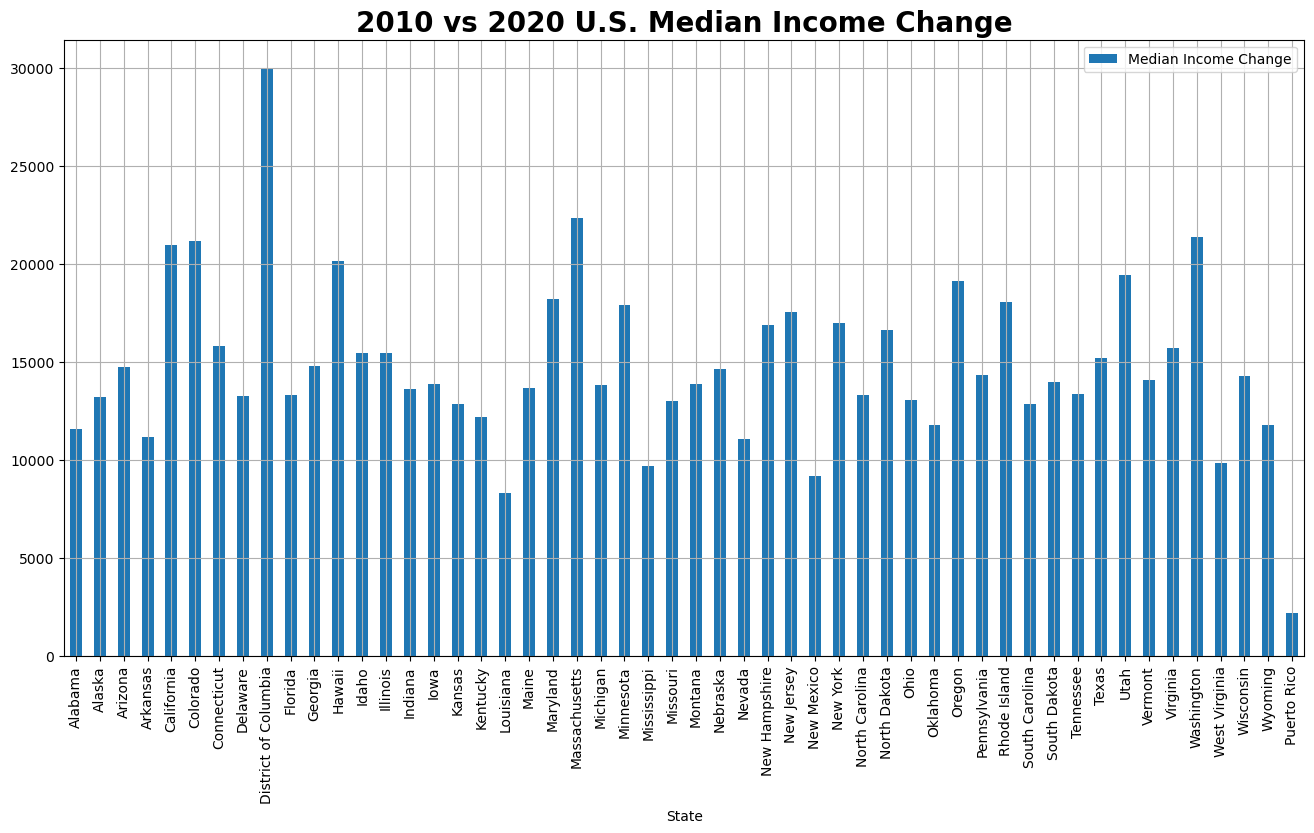

In [79]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='Median Income Change',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Median Income Change", fontsize=20, fontweight ='bold')
plt.grid()

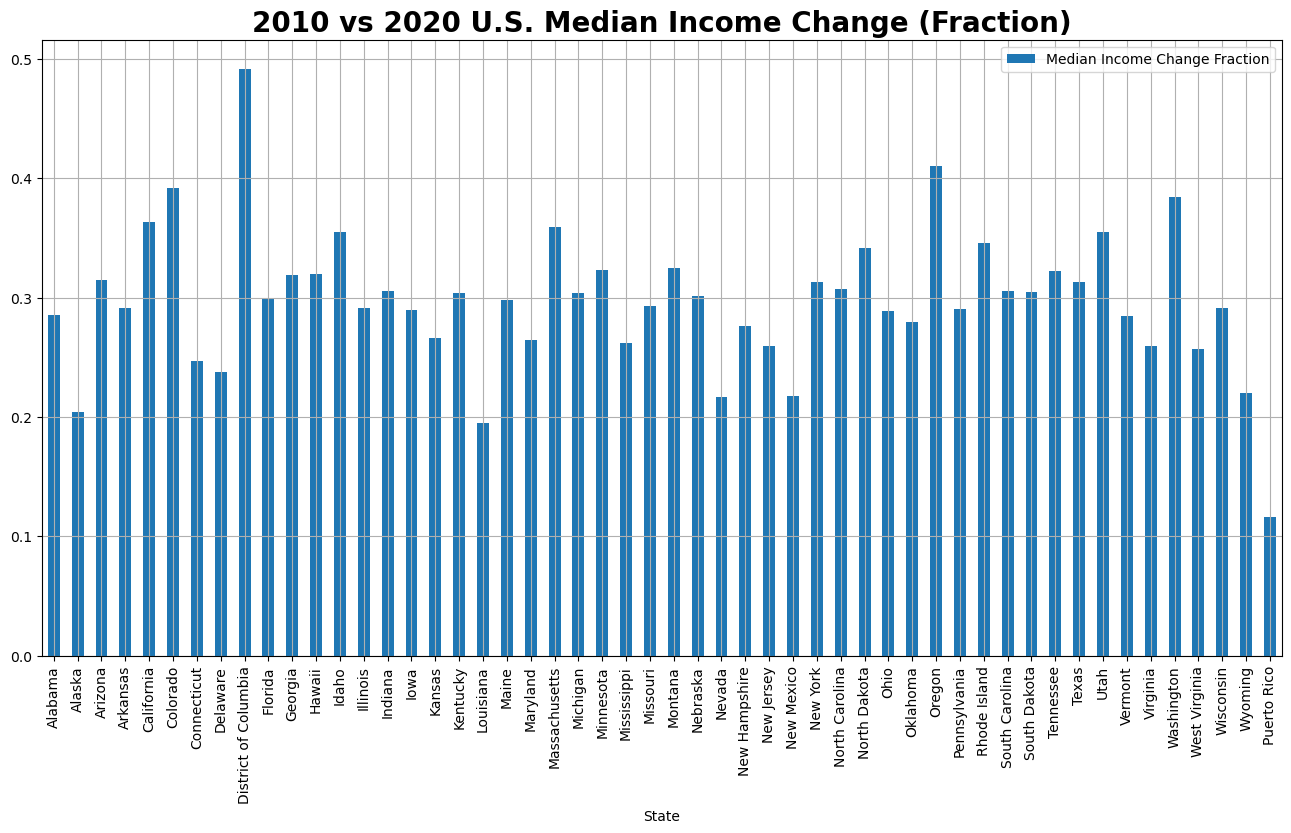

In [80]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='Median Income Change Fraction',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Median Income Change (Fraction)", fontsize=20, fontweight ='bold')
plt.grid()

#### Mean Income

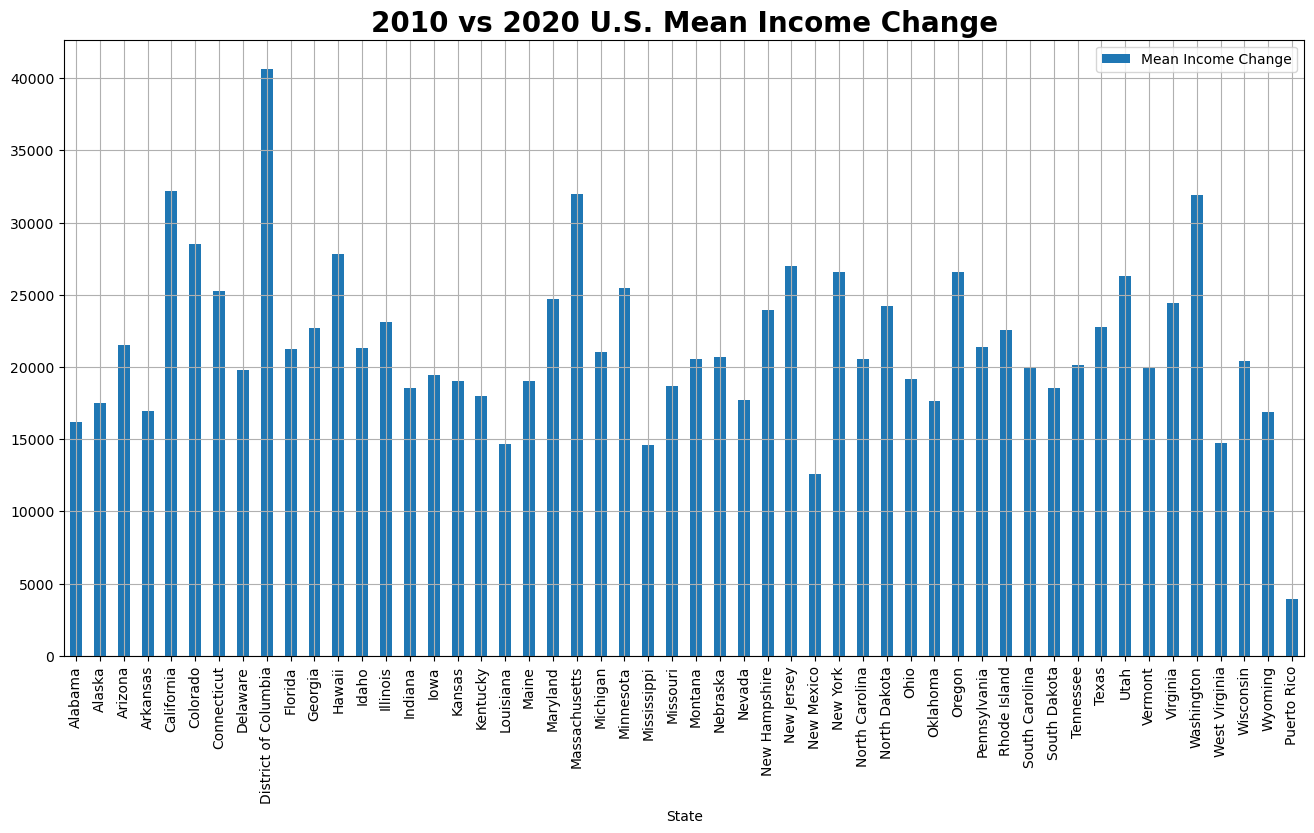

In [81]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='Mean Income Change',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Mean Income Change", fontsize=20, fontweight ='bold')
plt.grid()

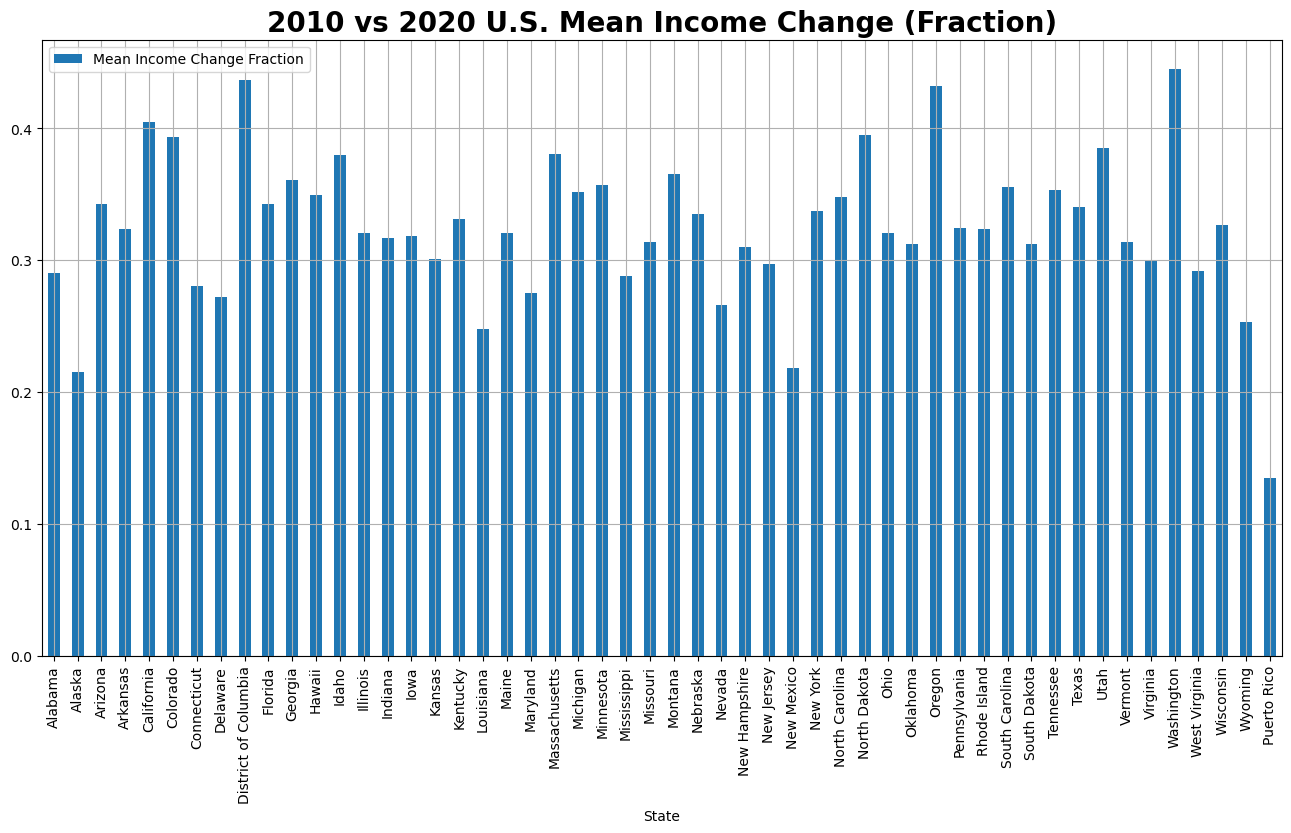

In [83]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='Mean Income Change Fraction',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Mean Income Change (Fraction)", fontsize=20, fontweight ='bold')
plt.grid()

#### Racial (Black or African American, White)

##### Black or African American

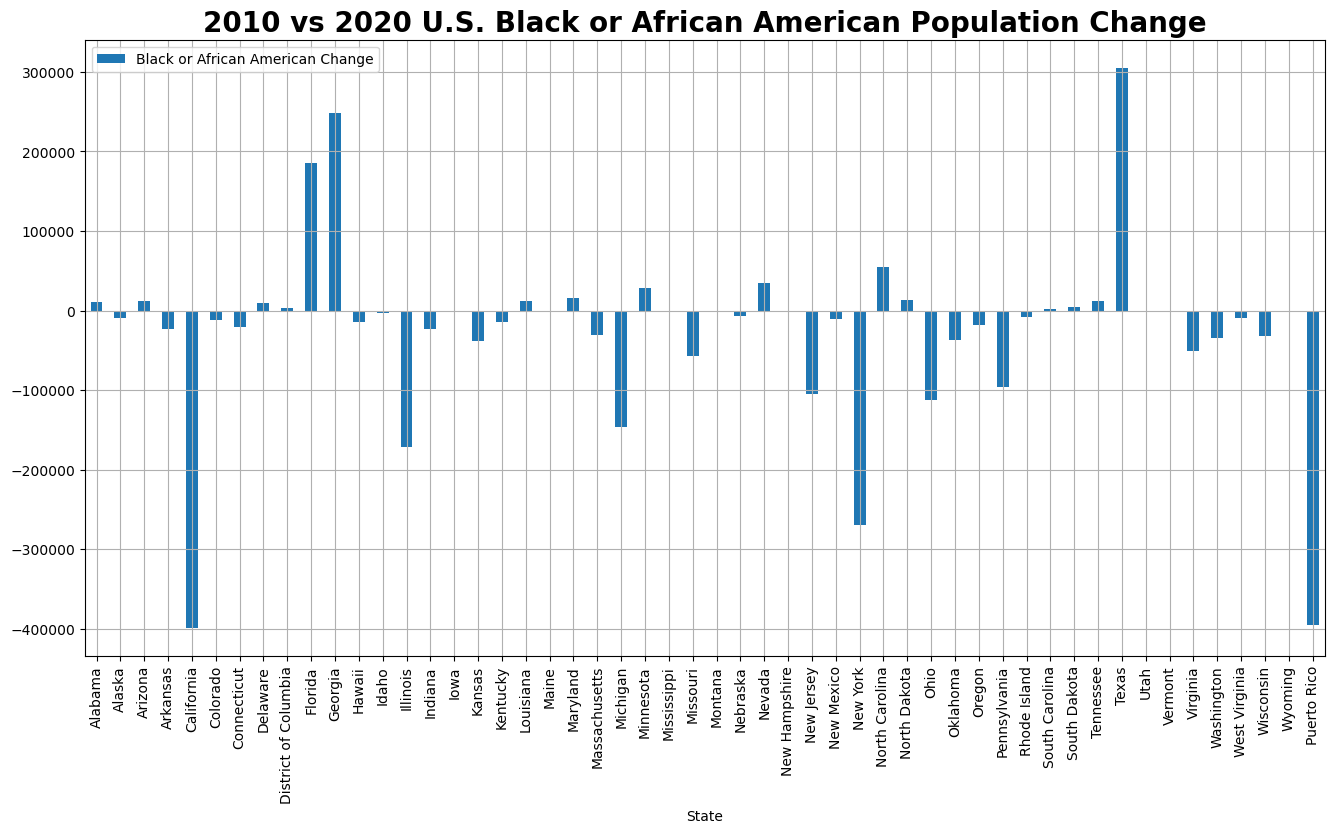

In [84]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='Black or African American Change',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Black or African American Population Change", fontsize=20, fontweight ='bold')
plt.grid()

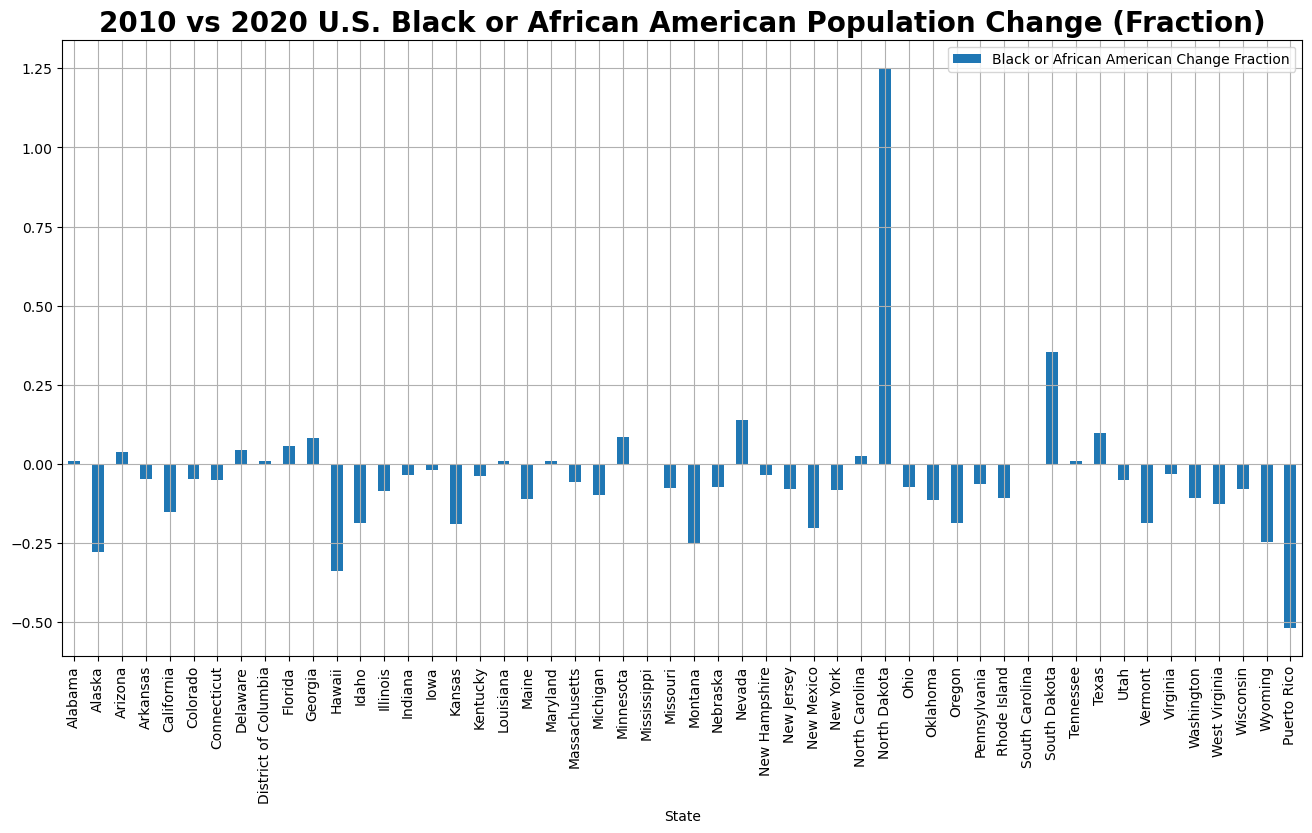

In [85]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='Black or African American Change Fraction',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Black or African American Population Change (Fraction)", fontsize=20, fontweight ='bold')
plt.grid()

##### White

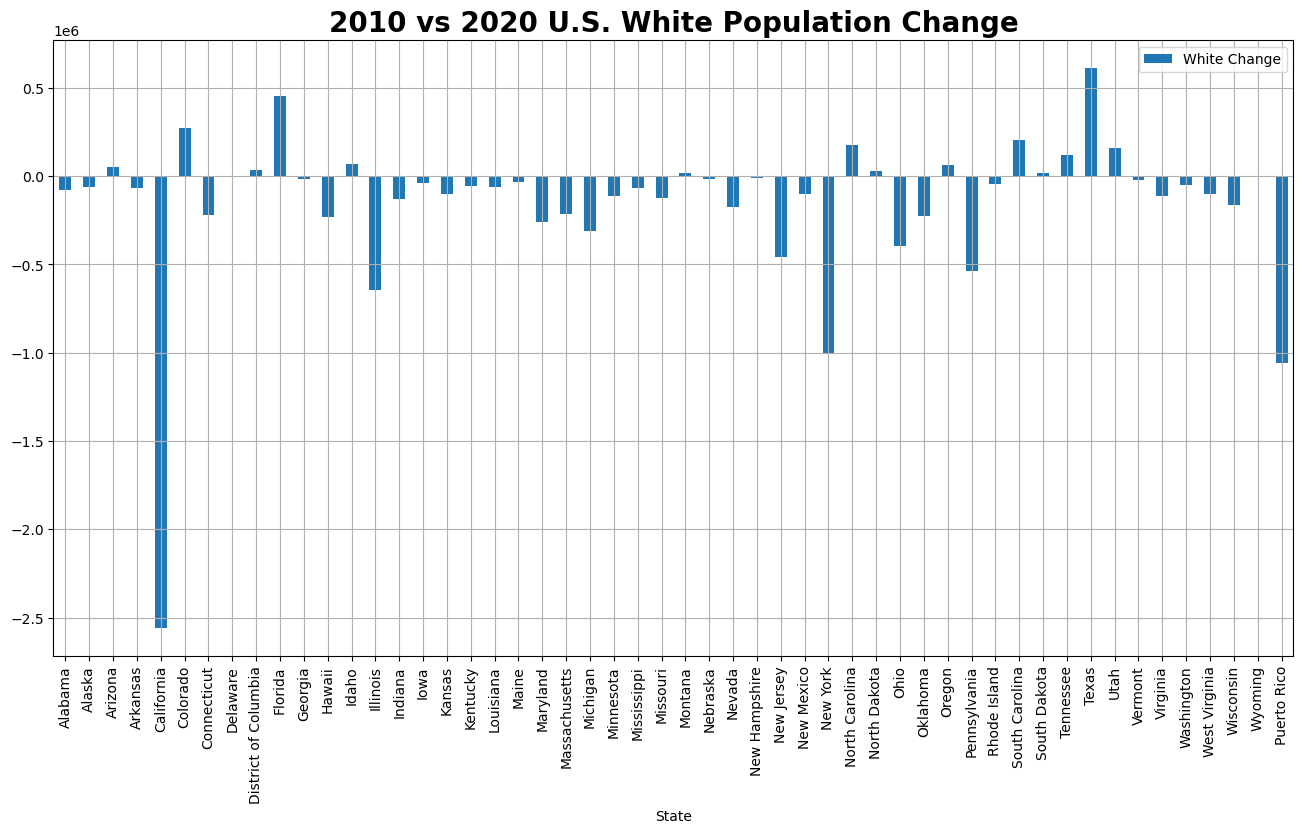

In [86]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='White Change',ax=plt.gca())
plt.title("2010 vs 2020 U.S. White Population Change", fontsize=20, fontweight ='bold')
plt.grid()

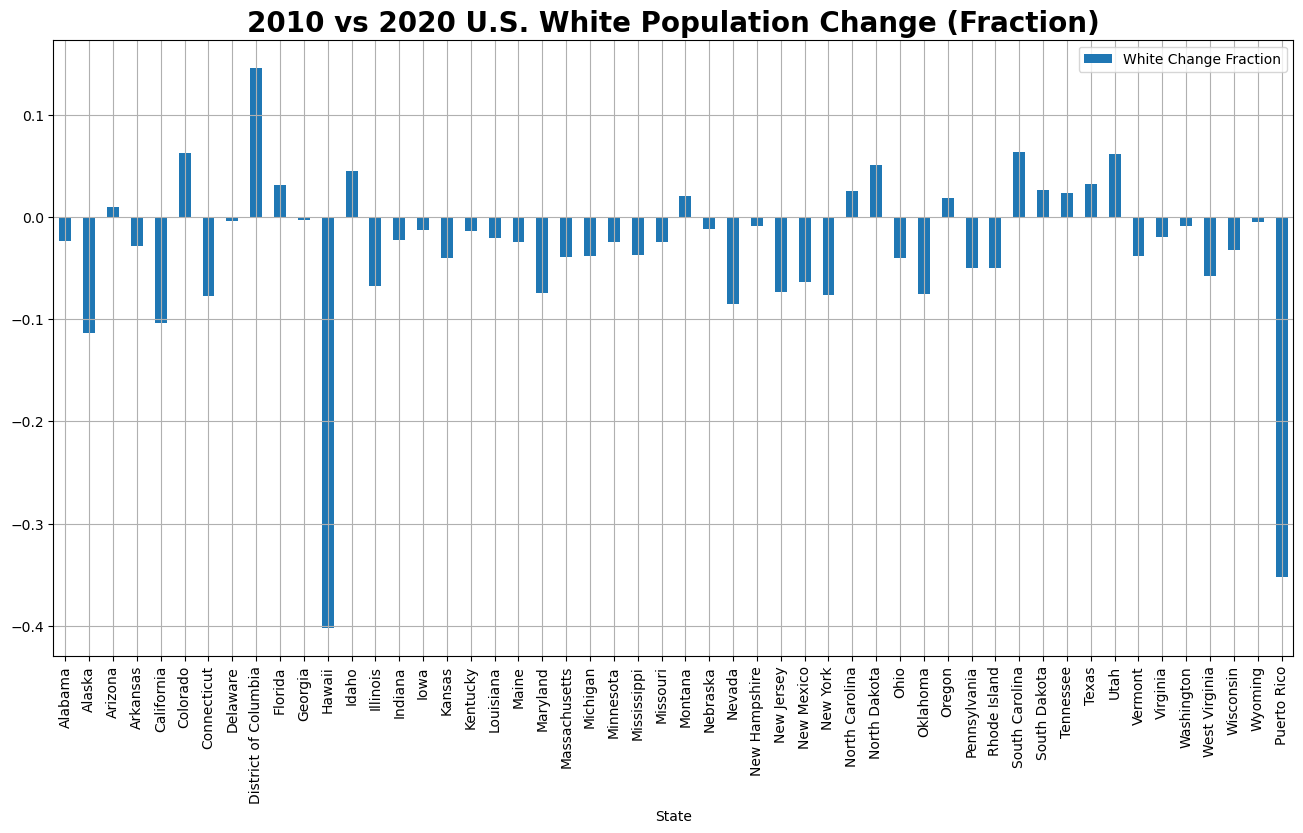

In [87]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='White Change Fraction',ax=plt.gca())
plt.title("2010 vs 2020 U.S. White Population Change (Fraction)", fontsize=20, fontweight ='bold')
plt.grid()

## HERE